In [1]:
%matplotlib nbagg
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from setup import *
import pandas as pd
import numpy as np
import scipy
from scipy import ndimage


In [10]:
import os
print (os.listdir('/Users/wdpryor1994/Downloads/madelbrot2.png'))

FileNotFoundError: [Errno 2] No such file or directory: '*/Users/wdpryor1994/Downloads/madelbrot2.png'

In [7]:

img = mpimg.imread('madelbrot2.png')
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'madelbrot2.png'

# The line

### The line is not how we invisioned it yet. The program will take the line and plot the verticle distance from each point on the line to the fractal edge. Only DIRECTLY in the y direction. And Up. Note that this is in the negative y direction, because the image is created with a 2D matrix where 0,0 is the top left.

## Instructions:
1. Run the next cell
1. Click twice for your end points, the first click will NOT show a marker, just remember where you click.
1. Once you see your line, click the top right "power" button for the plot. This will save the line info.

###  NOTE: Clicking more times will draw more segments at the moment, this program ONLY looks at the first and last points as endpoints, nothing in between. 

<IPython.core.display.Javascript object>


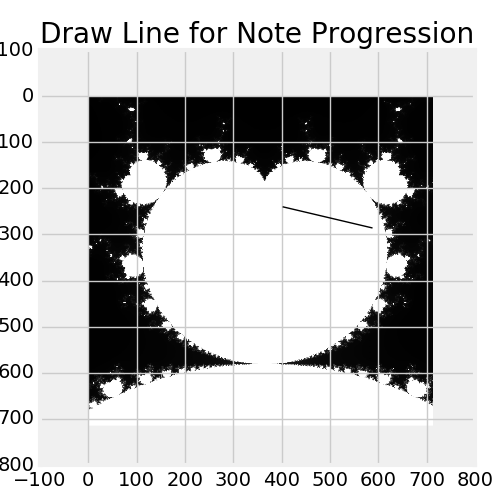

In [4]:
%matplotlib nbagg
class LineBuilder:
    pos_list = []
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(int(event.xdata))
        self.ys.append(int(event.ydata))
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        

pos_list = []        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Draw Line for Note Progression')
ax.imshow(img, aspect='auto')
line, = ax.plot([], [], c='black', linewidth = 1)  # empty line
linebuilder = LineBuilder(line)

In [5]:
print(linebuilder.xs, linebuilder.ys) #excute this line to check your endpoints. 

[402, 588] [240, 286]


In [14]:
d = [] #empty list for distances
m = float(linebuilder.ys[-1]-linebuilder.ys[0])/float(linebuilder.xs[-1]-linebuilder.xs[0]) #slope of your line

# print(round(linebuilder.ys[0]+(linebuilder.xs[-1]-linebuilder.xs[0])*m))
for i in range(int(abs(linebuilder.xs[0]-linebuilder.xs[-1]))): #loop through x points and find the distance in y to the fractal edge
    x = round(linebuilder.xs[0]+i)  #we have to round because. Pixels.
    y = round(linebuilder.ys[0]+i*m)
#     print(x,y)
    yi = y
    while (y>0): 
#         print(str(y)+'      ' + str(img[x][y][0]))
        if img[y][x][0] >= 0.5:  #if the pixel is white, move toward the boarder (TOP) NOTE: y axis is flipped
            y -= 1
        else: #if black, done, add this distance to the list and break out of loop
            d.append(abs(yi-y))
            break

<IPython.core.display.Javascript object>


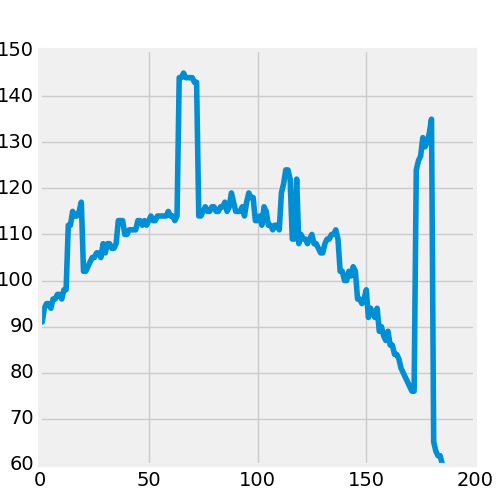

In [20]:
plt.clf()
nd = [x for x in d] # add a modular operation to the first x here to limit range. [x%14 for x in d] will give 2 octaves
plt.plot([i for i in range(int(abs(linebuilder.xs[0]-linebuilder.xs[-1])))],nd)
plt.show()

In [ ]:
from psonic import *
import random

In [ ]:
#key of E minor E, Fs, G, A, B, C, and D
#key of Ab: Ab, Bb, C, Db, Eb, F, G
e_minor = [Eb4,F4,G4,Ab4,Bb4,C4,Db4,Eb5,F5,G5,Ab5,Bb5,C5,Db5]  # sharps should be like this: Fs5

note_list = [nd[0]]  #need first note,duration for comparison
duration_list = [0.25]

for x in nd:
    if note_list[-1] == x: #if the last note was the same as this one, use random number to determine if new note or not
        if random.random() >= 0.4: # if true, make the previous note longer, don't add a new note
            duration_list[-1] += 0.25
        else: #add a new note
            duration_list.append(0.25)
            note_list.append(x)
    else: #if the previous note was different, always add a new note.
        note_list.append(x)
        duration_list.append(0.25)


In [ ]:
use_synth(SAW) #set the instrument

for i in range(len(note_list)): #iterate through lists and play notes
    play(e_minor[note_list[i]])
    sleep(duration_list[i])